# Python Data Visualization

## Topics:
* Conduct exploratory data analysis by demonstrating the visualization types and features within the Python Seaborn library

* [Distributions](#scrollTo=i3ALXIX1orNq&line=1&uniqifier=1) - `sns.displot()`
  * Univariate
    * Histogram - `sns.histplot()` kind = "hist"
    * KDE - `sns.kdeplot()` kind = "kde"
    * ECDF - `sns.ecdfplot()` kind = "ecdf"
  * Bivariate
    * Jointplot - `sns.jointplot()`
    * Pairplot - `sns.pairplot()`
* [Relationships](#scrollTo=UlXFtjImyEyZ&line=1&uniqifier=1) - `sns.relplot()`
  * Scatterplot - `scatterplot()` (with kind="scatter"; the default)
  * Lineplot - `lineplot()` (with kind="line")
  * Regression Plot - `sns.regplot` or `sns.lmplot`
* [Categorical Data](#scrollTo=bH2uX8zDCQKJ&line=4&uniqifier=1) - `sns.catplot()`
  * Categorical Estimate Plots
    * `barplot()` (with kind="bar")
    * `countplot()` (with kind="count")
  * Categorical Scatterplots
    * `stripplot()` (with kind="strip"; the default)
    * `swarmplot()` (with kind="swarm")
  * Categorical Distribution Plots
    * `boxplot()` (with kind="box")
    * `violinplot()` (with kind="violin")
* [Regression Plots](#scrollTo=10YYSdQb6h0T&line=5&uniqifier=1)
  * `sns.regplot()`
  * `sns.lmplot()`
  * `sns.residplot()`
* [Plotting Multiple Objects](#scrollTo=dwmKMCF4-jHI&line=6&uniqifier=1)
  * `FacetGrid`
  * `FacetGrid.map()`
* [Correlation Heatmap](#scrollTo=OCd96JQ0NNA7&line=1&uniqifier=1)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [ ]:
tips = sns.load_dataset("tips")
penguins = sns.load_dataset("penguins")
fmri = sns.load_dataset("fmri")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab/Datasets/marketing_campaign_dataset.csv'
# path = '/data/marketing_campaign_dataset.csv' # USE THIS PATH

df = pd.read_csv(path, encoding='utf-8', encoding_errors='ignore')

In [ ]:
df.head()

Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1  Innovate Industries         Email       Men 18-24  30 days   
1            2       NexGen Systems         Email     Women 35-44  60 days   
2            3    Alpha Innovations    Influencer       Men 25-34  30 days   
3            4   DataTech Solutions       Display        All Ages  60 days   
4            5       NexGen Systems         Email       Men 25-34  15 days   

  Channel_Used  Conversion_Rate Acquisition_Cost   ROI     Location  Language  \
0   Google Ads             0.04       $16,174.00  6.29      Chicago   Spanish   
1   Google Ads             0.12       $11,566.00  5.61     New York    German   
2      YouTube             0.07       $10,200.00  7.18  Los Angeles    French   
3      YouTube             0.11       $12,724.00  5.55        Miami  Mandarin   
4      YouTube             0.05       $16,452.00  6.50  Los Angeles  Mandarin   

   Clicks  Impressions  Engagement_Score     Customer_Segment        Date  
0     506         1922                 6    Health & Wellness  2021-01-01  
1     116         7523                 7         Fashionistas  2021-01-02  
2     584         7698                 1  Outdoor Adventurers  2021-01-03  
3     217         1820                 7    Health & Wellness  2021-01-04  
4     379         4201                 3    Health & Wellness  2021-01-05

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

# Data Preparation

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Acquisition_Cost'] = df['Acquisition_Cost'].str.replace('$', '').str.replace(',', '').astype('float')
df['Duration'] = df['Duration'].str.replace('days', '').str.strip().astype('int')
df['ROI'] = df['ROI'].div(100)
df['Revenue'] = df['Acquisition_Cost'] * (1 + df['ROI'])
df['Revenue'] = df['Revenue'].astype('int')
df['Conversions'] = df['Conversion_Rate'] * df['Impressions']
df['Conversions'] = df['Conversions'].astype('int')
df['CTR'] = df['Clicks'].div(df['Impressions'])

In [ ]:
df.head()

Campaign_ID              Company Campaign_Type Target_Audience  Duration  \
0            1  Innovate Industries         Email       Men 18-24        30   
1            2       NexGen Systems         Email     Women 35-44        60   
2            3    Alpha Innovations    Influencer       Men 25-34        30   
3            4   DataTech Solutions       Display        All Ages        60   
4            5       NexGen Systems         Email       Men 25-34        15   

  Channel_Used  Conversion_Rate  Acquisition_Cost     ROI     Location  \
0   Google Ads             0.04           16174.0  0.0629      Chicago   
1   Google Ads             0.12           11566.0  0.0561     New York   
2      YouTube             0.07           10200.0  0.0718  Los Angeles   
3      YouTube             0.11           12724.0  0.0555        Miami   
4      YouTube             0.05           16452.0  0.0650  Los Angeles   

   Language  Clicks  Impressions  Engagement_Score     Customer_Segment  \
0   Spanish     506         1922                 6    Health & Wellness   
1    German     116         7523                 7         Fashionistas   
2    French     584         7698                 1  Outdoor Adventurers   
3  Mandarin     217         1820                 7    Health & Wellness   
4  Mandarin     379         4201                 3    Health & Wellness   

        Date  Revenue  Conversions       CTR  
0 2021-01-01    17191           76  0.263267  
1 2021-01-02    12214          902  0.015419  
2 2021-01-03    10932          538  0.075864  
3 2021-01-04    13430          200  0.119231  
4 2021-01-05    17521          210  0.090217

# Seaborn Visualization Types

# Distribution Plots

https://seaborn.pydata.org/tutorial/distributions.html

# Histogram

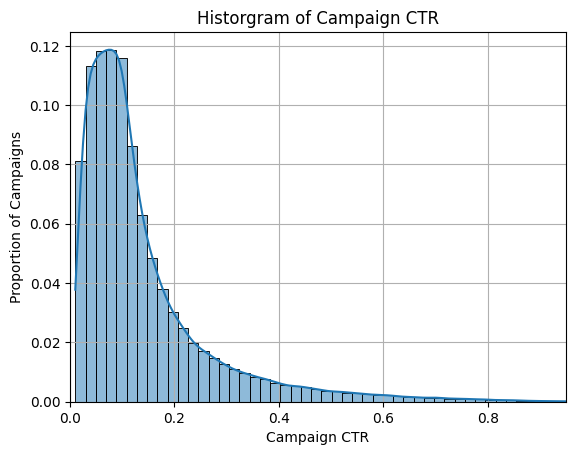

In [ ]:
# histogram
sns.histplot(data= df, x="CTR", bins=50, stat="probability", kde=True)
# sns.displot(data= df, x="CTR", bins=50, stat="probability", kde=True, kind="hist")
plt.title('Historgram of Campaign CTR')
plt.xlabel('Campaign CTR')
plt.ylabel('Proportion of Campaigns')
plt.xlim(0, 0.95)
plt.grid(True)
# plt.figure(figsize=(50, 50))

In [ ]:
df_new = df.copy()
df_new['CTR_log'] = np.log(df_new['CTR'])

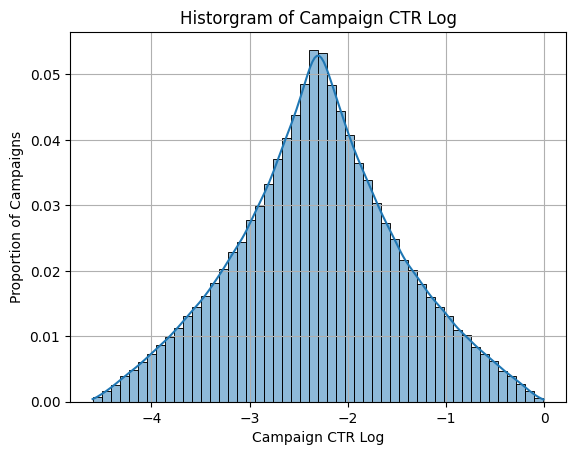

In [ ]:
# histogram
sns.histplot(data= df_new, x="CTR_log", bins=50, stat="probability", kde=True)
plt.title('Historgram of Campaign CTR Log')
plt.xlabel('Campaign CTR Log')
plt.ylabel('Proportion of Campaigns')
plt.grid(True)

# 📘 Parameter Reference `sns.histplot()`

| Parameter      | Description                                                                 | Type                  | Values                                                                                  |
|----------------|-----------------------------------------------------------------------------|-----------------------|------------------------------------------------------------------------------------------|
| `data`         | Dataset containing variables referenced by `x`, `y`, etc.                  | DataFrame             | - A `pandas.DataFrame` or array-like object                                             |
| `x`            | Data for the x-axis (primary variable for histogram)                        | str or array-like     | - Column name in `data`<br>- Array-like object                                          |
| `y`            | Optional variable for vertical histogram                                    | str or array-like     | - Column name or array (rarely used)                                                    |
| `hue`          | Variable to group the bars by color                                         | str                   | - Column name in `data`                                                                 |
| `weights`      | Weights to apply to each observation                                        | str or array-like     | - Column name or array of weights                                                       |
| `stat`         | Aggregation mode                                                            | str                   | - `"count"`: Raw counts<br>- `"frequency"`: Fraction of total<br>- `"probability"`<br>- `"percent"`<br>- `"density"` |
| `bins`         | Number of bins or explicit bin edges                                        | int or sequence       | - Integer (e.g., `30`)<br>- List of bin edges                                           |
| `binwidth`     | Width of each bin                                                           | float                 | - E.g., `0.5`                                                                            |
| `binrange`     | Range of values to bin                                                      | tuple of (min, max)   | - E.g., `(0, 100)`                                                                      |
| `discrete`     | Treat values as discrete categories                                         | bool                  | - `True`: for categorical/numeric integer data<br>- `False`: for continuous data        |
| `multiple`     | How to handle multiple bars by `hue`                                        | str                   | - `"layer"`: Overlap bars<br>- `"stack"`: Stack bars<br>- `"dodge"`: Side-by-side       |
| `common_bins`  | Use shared bin edges for all levels of `hue`                                | bool                  | - `True` or `False`                                                                     |
| `element`      | Visual element used for the bars                                            | str                   | - `"bars"` (default)<br>- `"step"`: outlines<br>- `"poly"`: polygonal fill              |
| `fill`         | Fill bars or just outline                                                   | bool                  | - `True` (default) or `False`                                                           |
| `shrink`       | Proportion to shrink each bar's width                                       | float                 | - Range from `0` to `1`, e.g., `0.8`                                                     |
| `kde`          | Overlay Kernel Density Estimate curve                                       | bool                  | - `True` or `False`                                                                     |
| `line_kws`     | Additional keyword args for the `step` or KDE line                          | dict                  | - E.g., `{'linestyle': '--', 'linewidth': 2}`                                           |
| `legend`       | Whether to display legend                                                   | bool                  | - `True` or `False`                                                                     |
| `ax`           | Pre-existing Matplotlib Axes object to draw onto                            | `matplotlib.axes.Axes`| - Use `plt.gca()` or custom Axes                                                        |
| `**kwargs`     | Passed to underlying plotting function (`matplotlib.pyplot.bar`)            | varies                | - E.g., `alpha`, `color`, `label`, etc.                                                 |


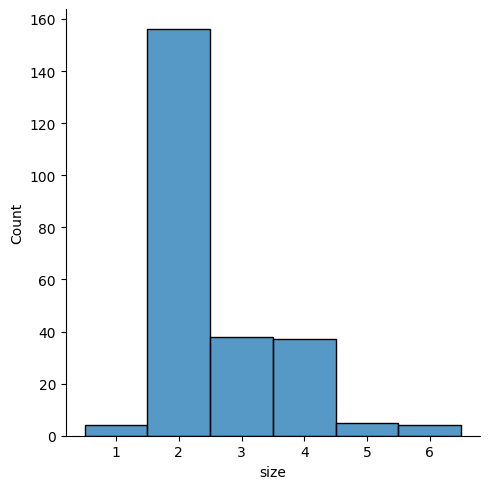

In [ ]:
tips = sns.load_dataset("tips")
penguins = sns.load_dataset("penguins")

# discrete=True, which chooses bin breaks that represent the unique values in a dataset with bars that are centered on their corresponding value
sns.displot(tips, x="size", discrete=True);

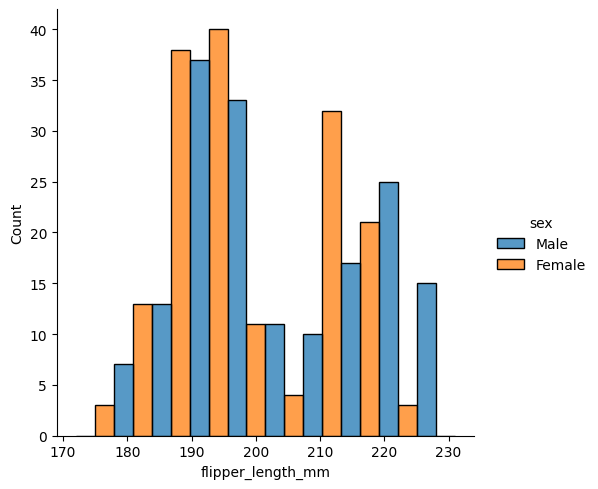

In [ ]:
# Another option is “dodge” the bars, which moves them horizontally and reduces their width. This ensures that there are no overlaps and that the bars remain comparable in terms of height. But it only works well when the categorical variable has a small number of levels
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge");

# Kernel Density Plot

A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:

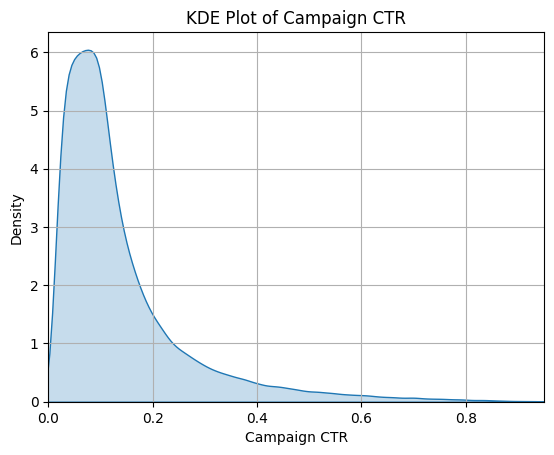

In [ ]:
sns.kdeplot(data= df, x="CTR", fill=True)
plt.title('KDE Plot of Campaign CTR')
plt.xlabel('Campaign CTR')
plt.ylabel('Density')
plt.xlim(0, 0.95)
plt.grid(True)
# sns.displot(data= df, x="CTR", fill=True, kind="kde")

# 📘 `sns.kdeplot()` Parameter Reference

| Parameter      | Description                                                                 | Type                  | Values                                                                                  |
|----------------|-----------------------------------------------------------------------------|-----------------------|------------------------------------------------------------------------------------------|
| `data`         | Dataset containing variables referenced by `x`, `y`, etc.                  | DataFrame             | - A `pandas.DataFrame` or array-like object                                             |
| `x`            | Data for the x-axis (primary variable for KDE)                             | str or array-like     | - Column name in `data`<br>- Array-like object                                          |
| `y`            | Optional second variable for bivariate KDE                                 | str or array-like     | - Column name or array                                                                  |
| `hue`          | Grouping variable to draw multiple KDEs in different colors                | str                   | - Column name in `data`                                                                 |
| `weights`      | Weights for each data point                                                | str or array-like     | - Column name or array of weights                                                       |
| `bw_method`    | Bandwidth selection method                                                  | str, scalar, or callable| - `"scott"` (default)<br>- `"silverman"`<br>- float (e.g. 0.5)<br>- callable function   |
| `bw_adjust`    | Factor to adjust the bandwidth                                              | float                 | - E.g., `bw_adjust=0.5` to halve the default bandwidth                                  |
| `common_norm`  | Normalize across all subsets if using `hue`                                | bool                  | - `True` (default) or `False`                                                           |
| `common_grid`  | Use same evaluation grid for all KDEs when using `hue`                    | bool                  | - `True` or `False`                                                                     |
| `cumulative`   | Plot cumulative distribution instead of density                            | bool                  | - `True` or `False`                                                                     |
| `cut`          | Distance in bandwidth units to extend the density curve past extreme data | float                 | - Default is `3`                                                                        |
| `clip`         | Range outside of which to clip the density estimate                       | tuple or list of tuples| - E.g., `(0, 100)` for univariate, `[(0, 100), (0, 1)]` for bivariate                    |
| `gridsize`     | Number of points on which KDE is evaluated                                | int                   | - Default is `512`                                                                      |
| `shade`        | *(Deprecated)* Use `fill` instead                                           | bool                  | - Use `fill=True` instead of `shade=True`                                               |
| `fill`         | Fill area under KDE curve                                                  | bool                  | - `True` or `False`                                                                     |
| `thresh`       | Minimum value to display in bivariate KDE                                  | float                 | - Default is `0.05`                                                                     |
| `levels`       | Number or specific contour levels for bivariate KDE                        | int or list           | - E.g., `5` or `[0.25, 0.5, 0.75]`                                                      |
| `color`        | Single color for KDE plot                                                  | str or RGB tuple      | - E.g., `'red'`, `'#00FF00'`, `(0.2, 0.4, 0.6)`                                          |
| `palette`      | Color palette if using `hue`                                               | str or sequence       | - E.g., `'pastel'`, `['red', 'blue']`                                                   |
| `alpha`        | Transparency level of the plot                                             | float                 | - Range: `0.0` (transparent) to `1.0` (opaque)                                           |
| `ax`           | Matplotlib Axes object to plot on                                          | `matplotlib.axes.Axes`| - Use `plt.gca()` or custom Axes                                                        |
| `**kwargs`     | Passed to matplotlib plotting functions (`plot`, `fill_between`, etc.)     | varies                | - E.g., `linewidth`, `linestyle`, `label`, etc.                                         |

# Empirical Cumulative Distribution (ECDF) Plot

This plot draws a monotonically-increasing curve through each datapoint such that the height of the curve reflects the proportion of observations with a smaller value

Text(0, 0.5, 'Proportion')

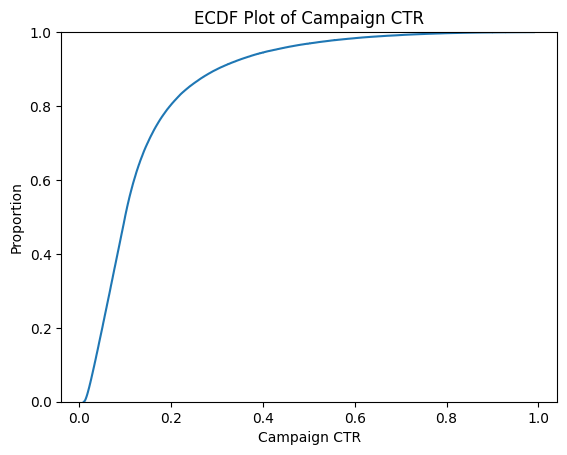

In [ ]:
sns.ecdfplot(df, x="CTR")
plt.title('ECDF Plot of Campaign CTR')
plt.xlabel('Campaign CTR')
plt.ylabel('Proportion')
# sns.displot(df, x="CTR", kind="ecdf")

# Jointplot
Plot Multiple Univariate and Bivariate Distributions

Text(37.722222222222214, 0.5, 'Impressions')

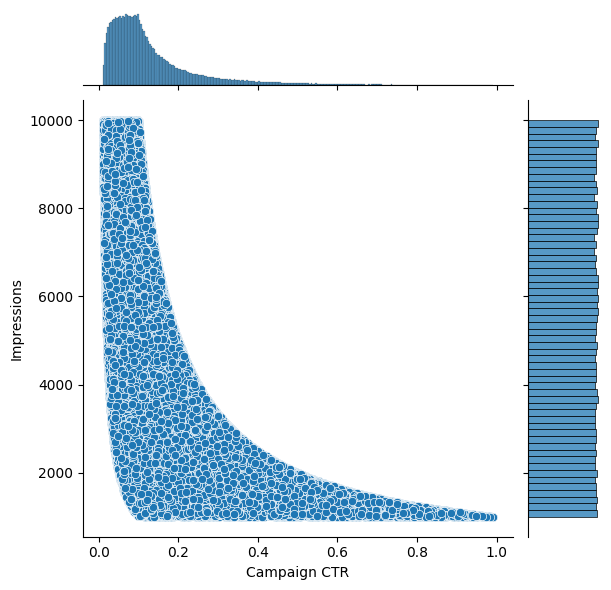

In [ ]:
sns.jointplot(data=df, x="CTR", y="Impressions")
# plt.title('Joint Plot: Campaign CTR x Impressions')
plt.xlabel('Campaign CTR')
plt.ylabel('Impressions')

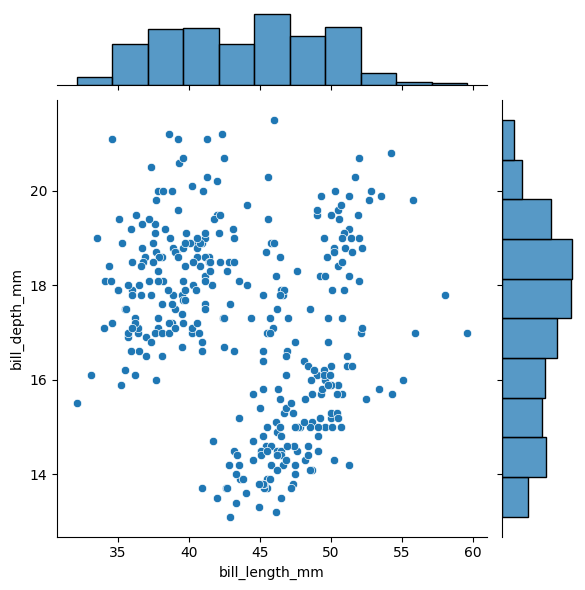

In [ ]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm");

# Pairplot

* Plots univariate and bivariate relationships
* Note: best to subset dataset prior to plotting

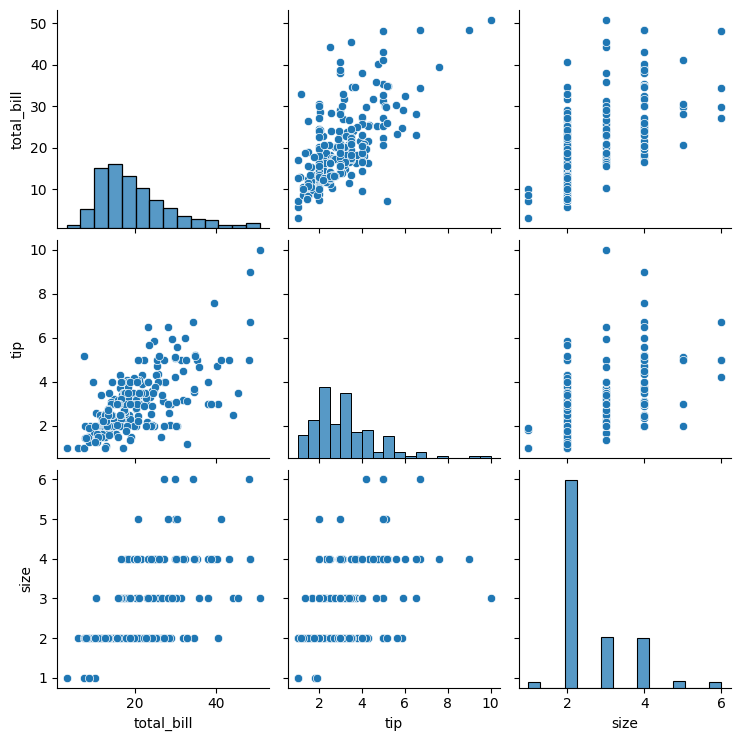

In [ ]:
sns.pairplot(tips);

[Back to Top](#scrollTo=J1VvPV7A4Mse&line=29&uniqifier=1)

# Relational Plots

https://seaborn.pydata.org/tutorial/relational.html

# Scatterplot

| Parameter | Description | Type | Values |
|---|---|---|---|
| `data` | Input data structure. | DataFrame, array, mapping, sequence |  |
| `x` | Variable that defines the data for the x-axis. | Vector or key in `data` |  |
| `y` | Variable that defines the data for the y-axis. | Vector or key in `data` |  |
| `hue` | Grouping variable that will produce points with different colors. | Vector or key in `data` |  |
| `size` | Grouping variable that will produce points with different sizes. | Vector or key in `data` |  |
| `style` | Grouping variable that will produce points with different markers. | Vector or key in `data` |  |
| `palette` | The color palette to use. | string, list, dict |  |
| `hue_order` | Order for the levels of the `hue` variable. | list |  |
| `hue_norm` |  Normalization in data units for mapping colors. | tuple or `matplotlib.colors.Normalize` |  |
| `sizes` | Range or mapping of point sizes. | list, tuple, dict |  |
| `size_order` | Order for the levels of the `size` variable. | list |  |
| `size_norm` | Normalization in data units for mapping point sizes. | tuple or `matplotlib.colors.Normalize` |  |
| `markers` | Object determining how to draw markers for different levels of the `style` variable.  | bool, dict |  |
| `style_order` | Order for the levels of the `style` variable. | list |  |
| `legend` | How to draw the legend. | "auto", "brief", "full", or False |  |
| `ax` |  Matplotlib Axes object to plot onto. | matplotlib Axes |  |
| `x_bins` | Group the data for plotting; use in conjunction with `estimator`. | int or vector |   |
| `y_bins` | Group the data for plotting; use in conjunction with `estimator`. | int or vector |   |
| `units` | Grouping variable that identifies independent sampling units. | Vector or key in `data` |  |
| `estimator` | Apply a statistical function to aggregate y values across x bins and plot the mean and confidence interval. | Name of pandas method or callable or None |  |
| `ci` | Size of the confidence interval when aggregating. | int in range (0, 100) |  |
| `n_boot` | Number of bootstrap samples used to compute confidence intervals. | int |  |
| `alpha` | Proportional opacity of the points. | float (0 to 1) |  |
| `x_jitter` | Amount of random noise added to the x-coordinates of data points. | float |  |
| `y_jitter` | Amount of random noise added to the y-coordinates of data points. | float |  |
| `**kwargs` | Other keyword arguments are passed to `matplotlib.axes.Axes.scatter()`. |  |  |

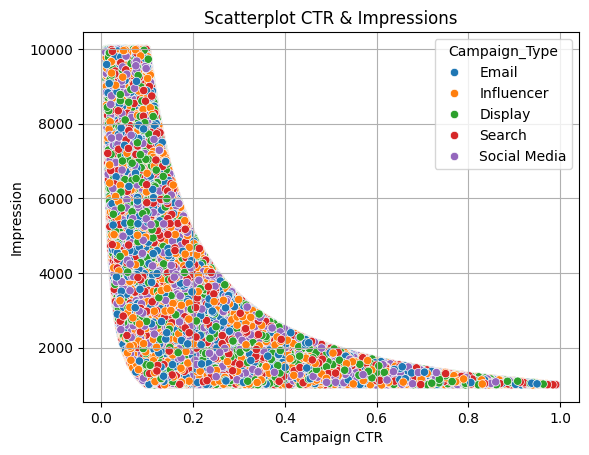

In [ ]:
sns.scatterplot(data=df, x="CTR", y="Impressions", hue="Campaign_Type");
# sns.relplot(data=df, x="CTR", y="Impressions", kind="scatter", hue="Campaign_Type");
plt.title('Scatterplot CTR & Impressions')
plt.xlabel('Campaign CTR')
plt.ylabel('Impression')
# plt.xlim(0, 0.95)
plt.grid(True)

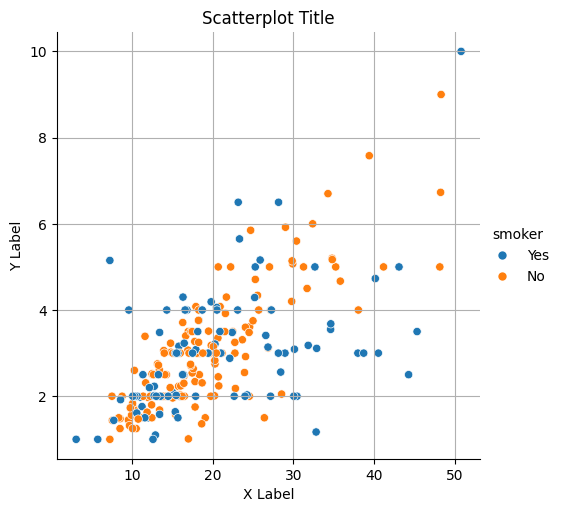

In [ ]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker");
plt.title('Scatterplot Title')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.grid(True)

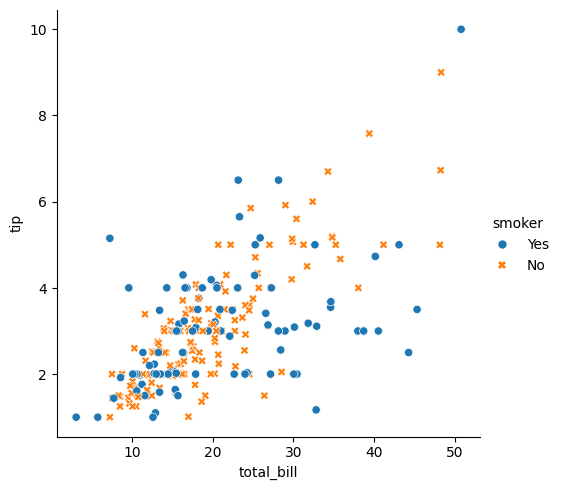

In [ ]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="smoker"
)

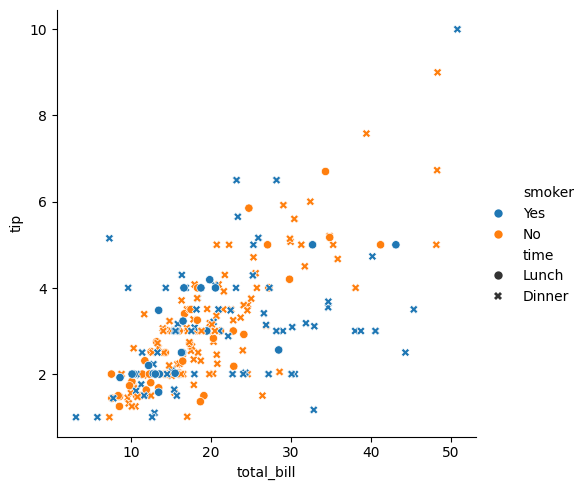

In [ ]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="time",
)

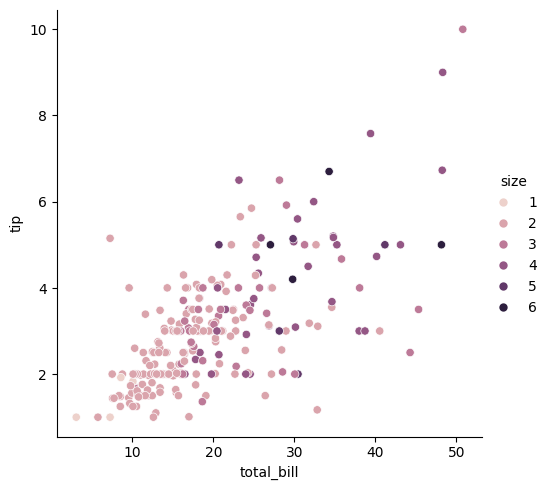

In [ ]:
sns.relplot(
    data=tips, x="total_bill", y="tip", hue="size",
)

# Lineplot

| Parameter | Description | Type | Values |
|---|---|---|---|
| `data` | Input data structure. | DataFrame, array, mapping, sequence |  |
| `x` | Variable that defines the data for the x-axis. | Vector or key in `data` |  |
| `y` | Variable that defines the data for the y-axis. | Vector or key in `data` |  |
| `hue` | Grouping variable that will produce lines with different colors. | Vector or key in `data` |  |
| `size` | Grouping variable that will produce lines with different widths. | Vector or key in `data` |  |
| `style` | Grouping variable that will produce lines with different dashes and/or markers. | Vector or key in `data` |  |
| `units` | Grouping variable that identifies independent sampling units. | Vector or key in `data` |  |
| `weights` | Weights applied to each observation.  | Vector or key in `data` |  |
| `palette` | The color palette to use. | string, list, dict |  |
| `hue_order` | Order for the levels of the `hue` variable. | list |  |
| `hue_norm` |  Normalization in data units for mapping colors. | tuple or `matplotlib.colors.Normalize` |  |
| `sizes` | Range or mapping of line widths. | list, tuple, dict |  |
| `size_order` | Order for the levels of the `size` variable. | list |  |
| `size_norm` |  Normalization in data units for mapping line widths. | tuple or `matplotlib.colors.Normalize` |  |
| `dashes` | Object determining how to draw lines for different levels of the `style` variable. | bool, list, dict |  |
| `markers` | Object determining how to draw markers for different levels of the `style` variable. | bool, list, dict |  |
| `style_order` | Order for the levels of the `style` variable. | list |  |
| `estimator` | Apply a statistical function to estimate central tendency. | Name of pandas method or callable or None |  |
| `errorbar` |  Method for plotting error bars. | string or tuple | -   `"ci"`: confidence interval (default) <br> -   `"se"`: standard error <br> -   `"sd"`: standard deviation <br> -   `tuple`: `(lower_bound, upper_bound)`  |
| `n_boot` | Number of bootstrap samples used to compute confidence intervals. | int |  |
| `seed` | Seed for the random number generator. | int |  |
| `orient` | Orientation of the plot. | "x" or "y" |  |
| `sort` | If `True`, sort data by `x` and `y` variables. | bool |  |
| `err_style` | Style of the error bars. | "band" or "bars" |  |
| `err_kws` |  Additional parameters for error bar aesthetics. | dict |  |
| `legend` | How to draw the legend. | "auto", "brief", "full", or False |  |
| `ax` | Matplotlib Axes object to plot onto. | matplotlib Axes |  |
| `**kwargs` | Other keyword arguments are passed to `matplotlib.axes.Axes.plot()`. |  |  |

In [ ]:
cols = ['Date', 'Revenue', 'Clicks', 'Impressions']

# aggregate time series using resample
df_date_line = df[cols].resample('D', on='Date').sum()
df_date_line

Revenue  Clicks  Impressions
Date                                    
2021-01-01  7246396  287148      3027100
2021-01-02  7339991  300316      2999929
2021-01-03  7303352  302927      3108943
2021-01-04  7175931  293974      2896980
2021-01-05  7438129  309724      2912871
...             ...     ...          ...
2021-12-27  7303668  302872      3087873
2021-12-28  7293494  301462      2956838
2021-12-29  7193287  300797      2996067
2021-12-30  7235591  304504      3069756
2021-12-31  7139462  294314      2943624

[365 rows x 3 columns]

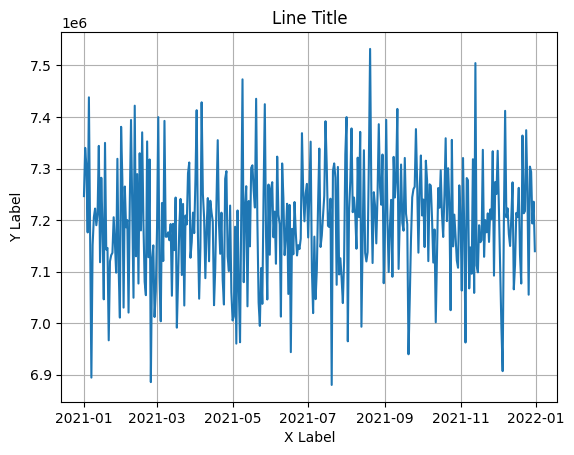

In [ ]:
sns.lineplot(data=df_date_line, x=df_date_line.index, y="Revenue");
# sns.relplot(data=df_date_line, x="Date", y="Revenue", kind="line")
plt.title('Line Title')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.grid(True)

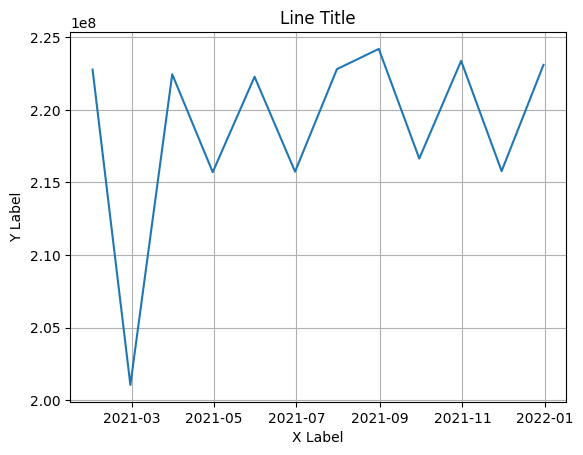

In [ ]:
# monthly trend
df_date_line = df[cols].resample('ME', on='Date').sum()


sns.lineplot(data=df_date_line, x=df_date_line.index, y="Revenue");
# sns.relplot(data=df_date_line, x="Date", y="Revenue", kind="line")
plt.title('Line Title')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.grid(True)

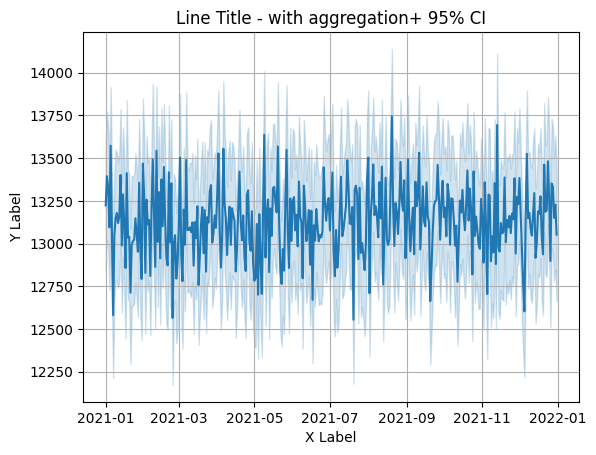

In [ ]:
# by default, with multiple dates, include mean aggregation and 95% CI

# mean revenue per day with 95% CI
sns.lineplot(data=df, x="Date", y="Revenue", estimator="mean");

# sns.relplot(data=df_date_line, x="Date", y="Revenue", kind="line")
plt.title('Line Title - with aggregation+ 95% CI')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.grid(True)

# # Other Aggregations
# sns.lineplot(data=df, x="Date", y="Revenue", estimator="sum");
# sns.lineplot(data=df, x="Date", y="Revenue", estimator="median");
# sns.lineplot(data=df, x="Date", y="Revenue", estimator="min");
# sns.lineplot(data=df, x="Date", y="Revenue", estimator="max");
# sns.lineplot(data=df, x="Date", y="Revenue", estimator="size");
# sns.lineplot(data=df, x="Date", y="Revenue", estimator="None");

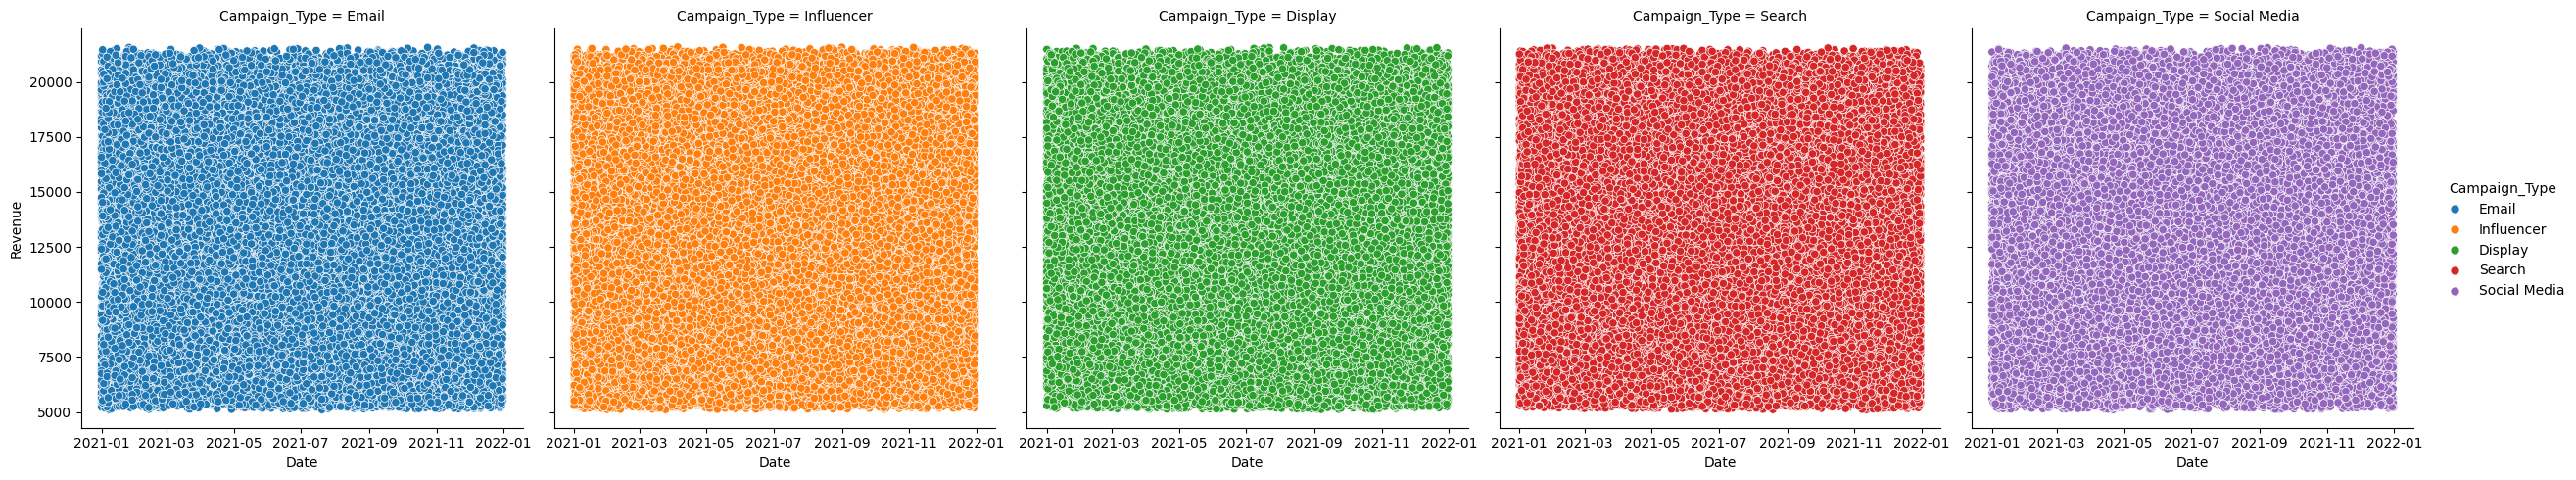

In [ ]:
# plotting multiple facets using 'col'
sns.relplot(data=df, x="Date", y="Revenue", hue = "Campaign_Type", col = "Campaign_Type");

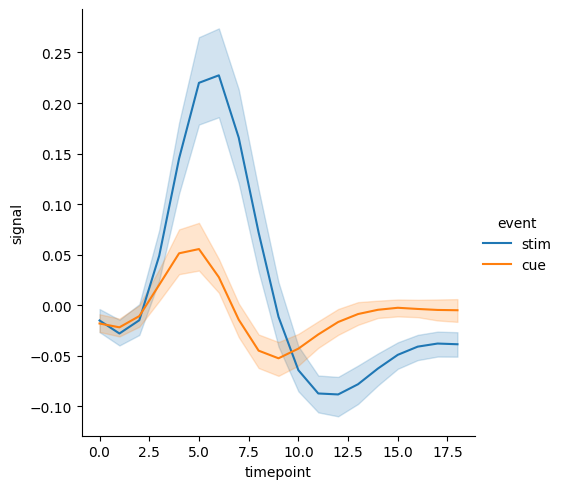

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event",
);

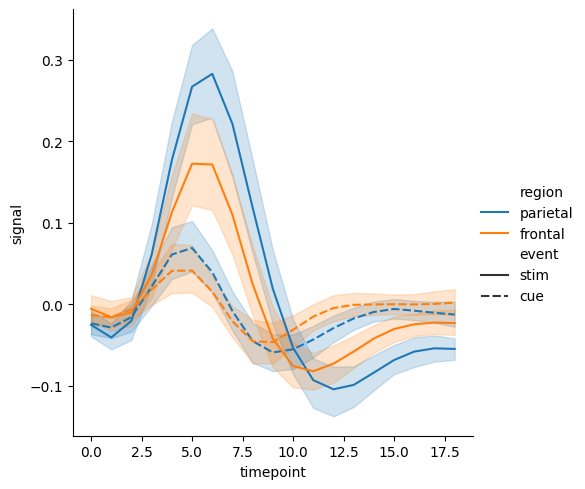

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region", style="event",
);

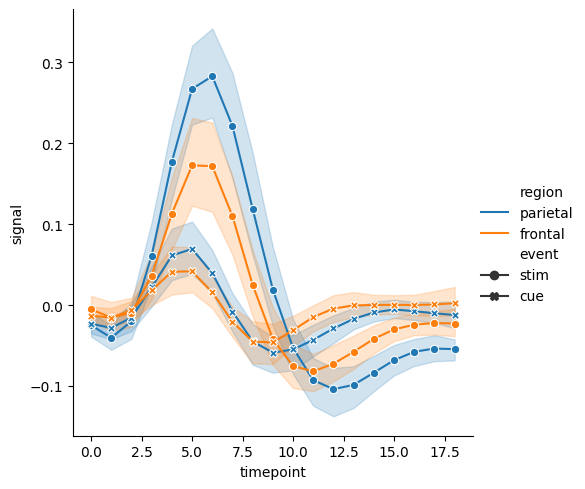

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="region", style="event",
    dashes=False, markers=True,
);

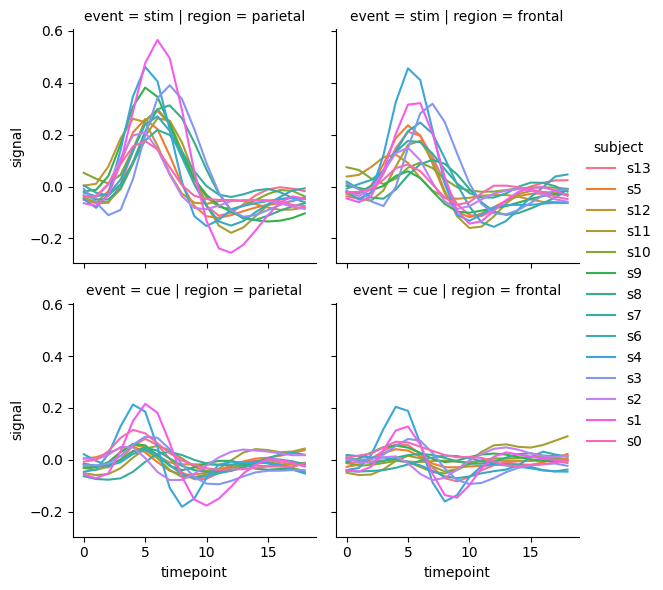

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="subject",
    col="region", row="event", height=3,
    estimator=None
);

[Back to Top](#scrollTo=J1VvPV7A4Mse&line=29&uniqifier=1)

# Categorical Plots
1. Categorical Estimate Plots: bar, count
2. Categorical Distribution: boxplot, violin
3. Categorical Scatterplots: string and swarm

https://seaborn.pydata.org/tutorial/categorical.html

# Categorical Estimate: barplot()

| Parameter | Description | Type | Values |
|---|---|---|---|
| `data` | Input data structure. | DataFrame, array, mapping, sequence |  |
| `x` | Variable that defines the data for the x-axis. | Vector or key in `data` |  |
| `y` | Variable that defines the data for the y-axis. | Vector or key in `data` |  |
| `hue` | Grouping variable that will produce bars with different colors. | Vector or key in `data` |  |
| `order` | Order for the levels of the `x` variable. | list |  |
| `hue_order` | Order for the levels of the `hue` variable. | list |  |
| `estimator` | Apply a statistical function to estimate central tendency. | Name of pandas method or callable or None | -   `np.mean` (default) <br> -   `np.median` <br> -   `np.sum` <br> -   `len` |
| `ci` | Size of the confidence interval to draw around the estimate. | float or "sd" or None |  |
| `n_boot` | Number of bootstrap iterations to use when computing confidence intervals. | int |  |
| `units` | Variable that identifies independent sampling units. | Vector or key in `data` |  |
| `seed` | Seed for the random number generator. | int, numpy.random.Generator, or numpy.random.RandomState |  |
| `orient` | Orientation of the plot. | "v" or "h" |  |
| `color` | Color for all of the elements. | matplotlib color |  |
| `palette` | The color palette to use. | string, list, dict |  |
| `saturation` | Proportion of the original color to retain. | float (0 to 1) |  |
| `errcolor` | Color for the error bars. | matplotlib color |  |
| `errwidth` | Thickness of the error bar lines. | float |  |
| `capsize` | Width of the "caps" on the error bars. | float |  |
| `dodge` | When using `hue` nesting, whether to shift elements along the categorical axis to avoid overlap. | bool or "auto" |  |
| `ax` | Matplotlib Axes object to draw the plot onto. | matplotlib Axes |  |
| `**kwargs` | Other keyword arguments are passed to `matplotlib.axes.Axes.bar()`. |  |  |
| `width` | Width of the bars. | float |  |
| `gap` | Space between bars in a grouped bar plot. | float |  |
| `log_scale` | Set axis scale(s) to log. | bool, number, or pair of bools or numbers |  |
| `native_scale` | If True, use the original scale of the data for the x- and y-axes. | bool |  |
| `fill` | If True, fill the bars with color. | bool |  |
| `hue_norm` |  Normalization in data units for mapping colors. | tuple or `matplotlib.colors.Normalize` |  |

Text(0, 0.5, 'Y Label')

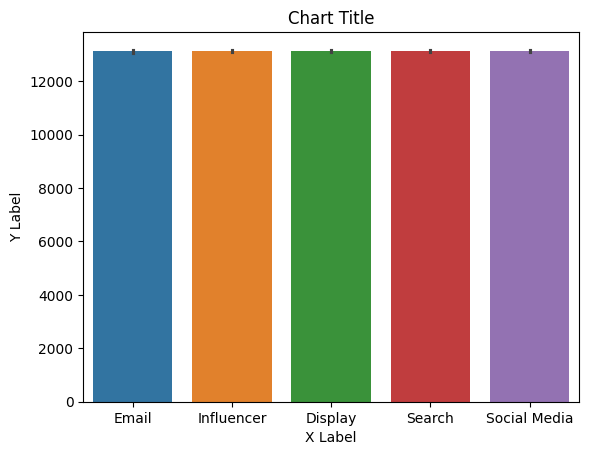

In [ ]:
# sns.barplot() aggregates the numeric variable, uses the mean by default
# also produces bootstrapped confidence intervals
sns.barplot(data=df, x="Campaign_Type", y="Revenue", estimator="mean", hue="Campaign_Type")
# sns.barplot(data=df, x="Campaign_Type", y="Revenue", estimator="mean", hue="Campaign_Type", kind="bar")
plt.title('Chart Title')
plt.xlabel('X Label')
plt.ylabel('Y Label')

<Axes: xlabel='Revenue', ylabel='Campaign_Type'>

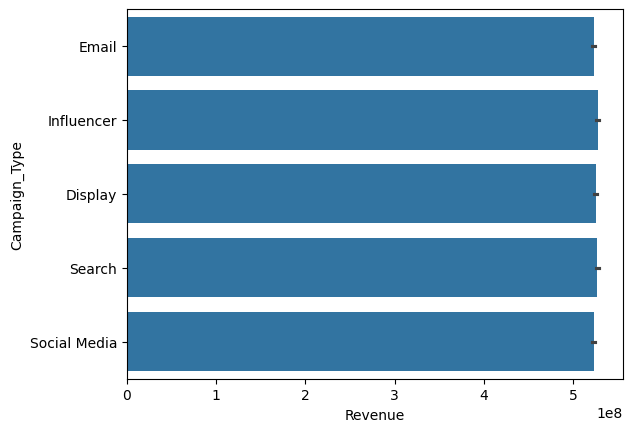

In [ ]:
sns.barplot(data=df, y="Campaign_Type", x="Revenue", estimator="sum")


Text(0, 0.5, 'Y Label')

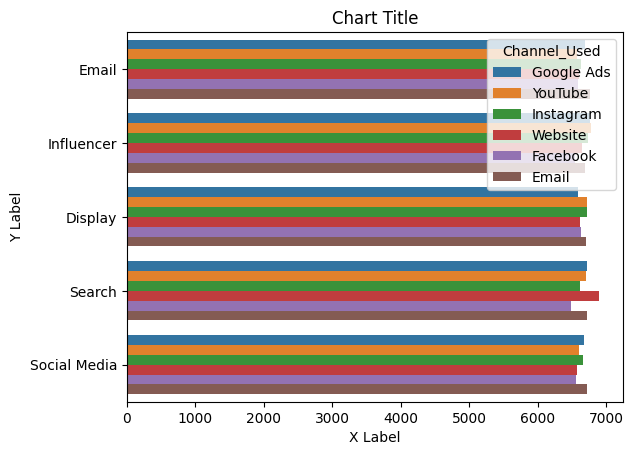

In [ ]:
# histogram for categorical data, use countplot()
sns.countplot(data=df, y="Campaign_Type", hue= "Channel_Used");

# sns.catplot(data=df, y="Campaign_Type", hue= "Channel_Used", kind="count");
plt.title('Chart Title')
plt.xlabel('X Label')
plt.ylabel('Y Label')

# sns.countplot(data=df, y="Campaign_Type", hue= "Channel_Used", stat="proportion");
# sns.countplot(data=df, y="Campaign_Type", hue= "Channel_Used", stat="percent");

# Categorical Distribution

# Boxplot

| Parameter | Description | Type | Values |
|---|---|---|---|
| `data` | Input data structure. | DataFrame, array, mapping, sequence |  |
| `x` | Variable that defines the data for the x-axis. | Vector or key in `data` |  |
| `y` | Variable that defines the data for the y-axis. | Vector or key in `data` |  |
| `hue` | Grouping variable that will produce boxes with different colors. | Vector or key in `data` |  |
| `order` | Order for the levels of the `x` variable. | list |  |
| `hue_order` | Order for the levels of the `hue` variable. | list |  |
| `orient` | Orientation of the plot. | "v" or "h" |  |
| `color` | Color for all of the elements. | matplotlib color |  |
| `palette` | The color palette to use. | string, list, dict |  |
| `saturation` | Proportion of the original color to retain. | float (0 to 1) |  |
| `width` | Width of the boxes. | float |  |
| `dodge` | When using `hue` nesting, whether to shift elements along the categorical axis. | bool or "auto" |  |
| `whis` | Proportion of the IQR extending to the plot whiskers. | float |  |
| `linewidth` | Width of the lines that frame the plot elements. | float |  |
| `linecolor` | Color of the lines that frame the plot elements. | matplotlib color |  |
| `fliersize` | Size of the markers used to indicate outlier observations. | float |  |
| `hue_norm` |  Normalization in data units for mapping colors. | tuple or `matplotlib.colors.Normalize` |  |
| `native_scale` | If True, use the original scale of the data for the x- and y-axes. | bool |  |
| `log_scale` | Set axis scale(s) to log.  | bool, number, or pair of bools or numbers |  |
| `formatter` |  Formatter for the axis labels. | callable |  |
| `legend` |  How to draw the legend. | "auto", "brief", "full", or False |  |
| `ax` | Matplotlib Axes object to draw the plot onto. | matplotlib Axes |  |
| `**kwargs` | Other keyword arguments are passed to `matplotlib.axes.Axes.boxplot()`. |  |  |

Text(0, 0.5, 'Y Label')

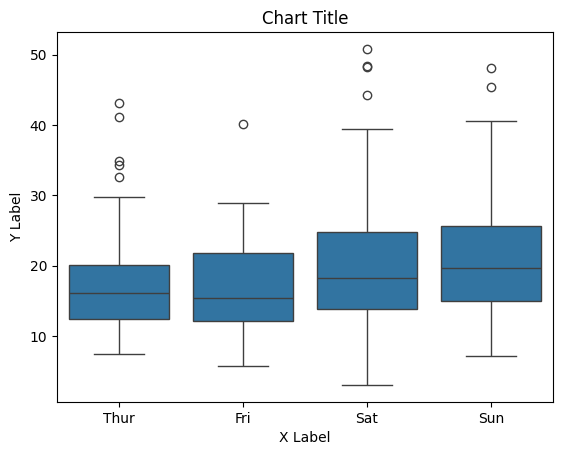

In [ ]:
sns.boxplot(data=tips, x="day", y="total_bill")
# sns.catplot(data=tips, x="day", y="total_bill", kind="box")
plt.title('Chart Title')
plt.xlabel('X Label')
plt.ylabel('Y Label')

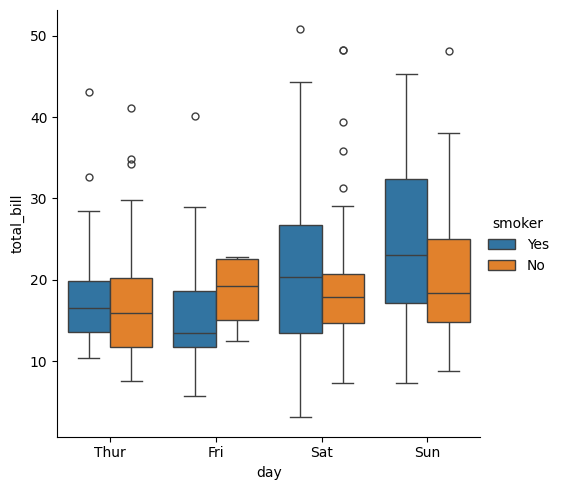

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")


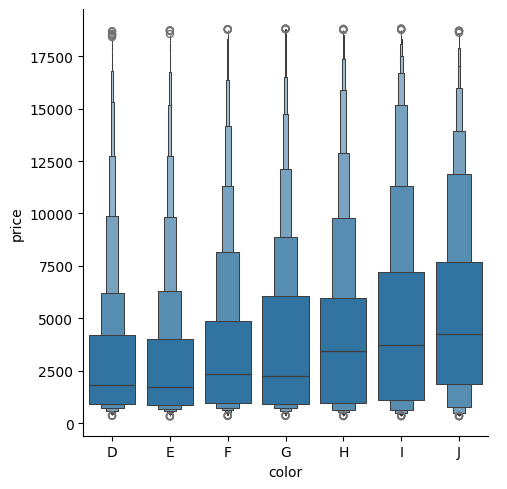

In [ ]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(
    data=diamonds.sort_values("color"),
    x="color", y="price", kind="boxen",
)

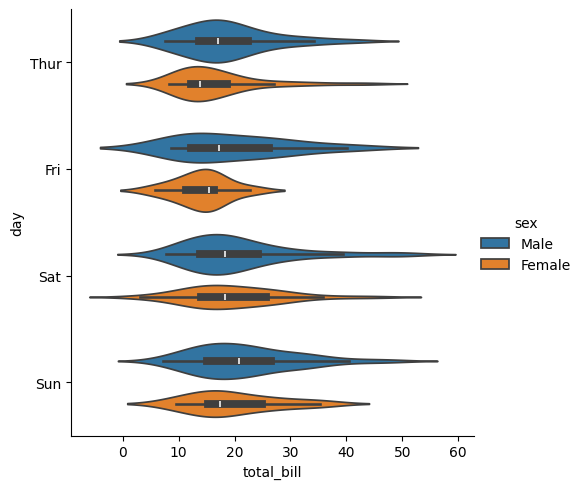

In [ ]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex", kind="violin",
)

# Categorical Relational Plots

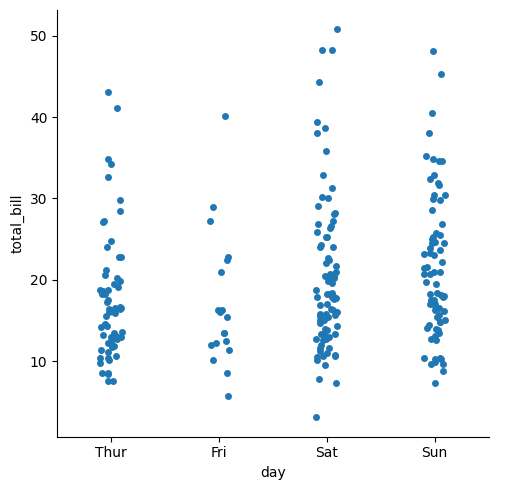

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill")

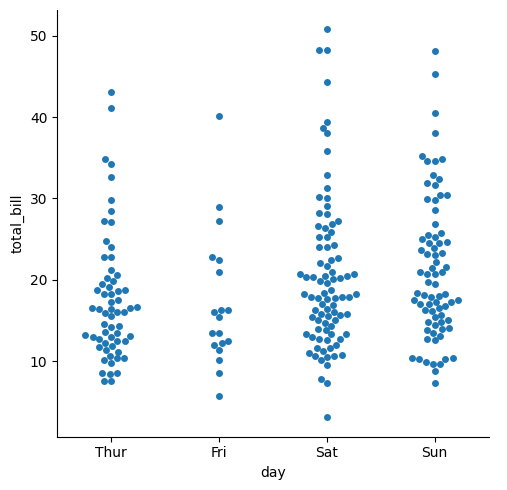

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm")

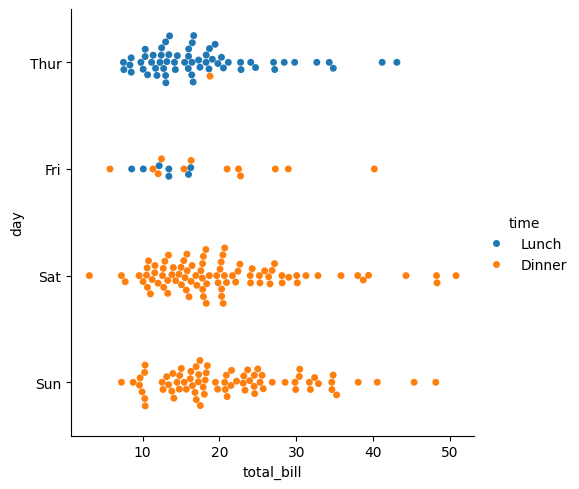

In [ ]:
sns.catplot(data=tips, x="total_bill", y="day", hue="time", kind="swarm")

[Back to Top](#scrollTo=J1VvPV7A4Mse&line=29&uniqifier=1)

# Regression Plots: `sns.regplot()`

| Parameter | Description | Type | Values |
|---|---|---|---|
| `x` | Independent variable. | Vector or key in `data` |  |
| `y` | Dependent variable. | Vector or key in `data` |  |
| `data` | Input data structure. | DataFrame |  |
| `x_estimator` |  Apply this function to each unique value of `x` and plot the resulting estimate. Useful when `x` is discrete. | callable (vector -> scalar) |  |
| `x_bins` | Bin the `x` variable into discrete bins and then estimate the central tendency and a confidence interval. | int or vector |  |
| `x_ci` | Size of the confidence interval used when plotting a central tendency for discrete `x` values. | "ci", "sd", int in [0, 100], or None |  |
| `scatter` | If `True`, draw the underlying observations as a scatterplot. | bool |  |
| `fit_reg` | If `True`, estimate and plot a regression model. | bool |  |
| `ci` | Size of the confidence interval for the regression estimate. | int in [0, 100] or None |  |
| `n_boot` | Number of bootstrap iterations used to compute the confidence intervals. | int |  |
| `units` |  Sampling units for use in a multilevel regression model. | Vector or key in `data` |  |
| `seed` |  Seed for the random number generator. | int, numpy.random.Generator, or numpy.random.RandomState |  |
| `order` | Order of the polynomial regression. If `order` is greater than 1, use `numpy.polyfit` to estimate the regression. | int |  |
| `logistic` | If `True`, assume that `y` is a binary variable and use statsmodels to estimate a logistic regression model. | bool |  |
| `lowess` | If `True`, use statsmodels to estimate a nonparametric lowess (locally weighted linear regression). | bool |  |
| `robust` | If `True`, use statsmodels to estimate a robust regression. | bool |  |
| `logx` | If `True`, estimate a linear regression of the form y ~ log(x). `x` must be positive. | bool |  |
| `x_partial` | One or more additional covariates to include in the regression model but not display in the plot. | array-like or DataFrame |  |
| `y_partial` | One or more additional covariates to include in the regression model but not display in the plot. | array-like or DataFrame |  |
| `truncate` | If `True`, the regression line is truncated to the range of the data. | bool |  |
| `dropna` | If `True`, drop observations with missing values. | bool |  |
| `x_jitter` | Amount of random noise added to the x-coordinates of the data points. | float |  |
| `y_jitter` | Amount of random noise added to the y-coordinates of the data points. | float |  |
| `label` | Label to apply to the plot for use in a legend. | str |  |
| `color` | Color to apply to all plot elements. | matplotlib color |  |
| `marker` | Marker to use for the scatterplot glyphs. | matplotlib marker |  |
| `line_kws` | Dictionary of keyword arguments to pass to `matplotlib.lines.Line2D`. | dict |  |
| `scatter_kws` | Dictionary of keyword arguments to pass to `matplotlib.axes.Axes.scatter()`. | dict |  |
| `ax` | Matplotlib Axes object to draw the plot onto. | matplotlib Axes |  |

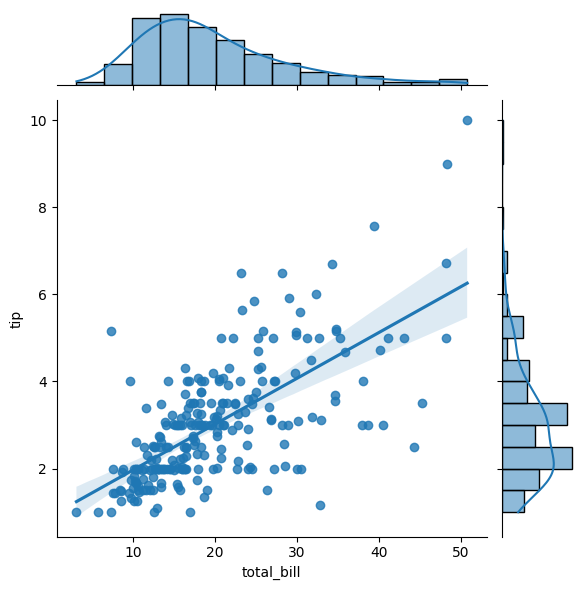

In [ ]:
# simple linear regression jointplot
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

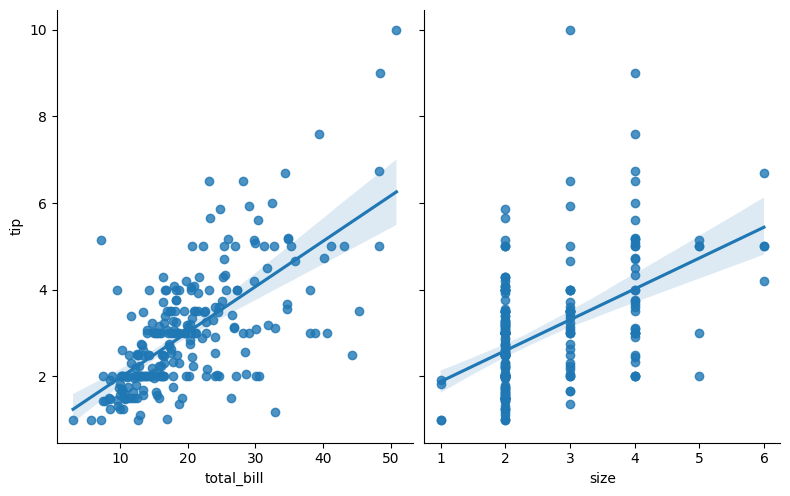

In [ ]:
# pairplot with regression line
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg");

[Back to Top](#scrollTo=J1VvPV7A4Mse&line=29&uniqifier=1)

# Regression Plots

* The two functions that can be used to visualize a linear fit are regplot() and lmplot().

* In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:

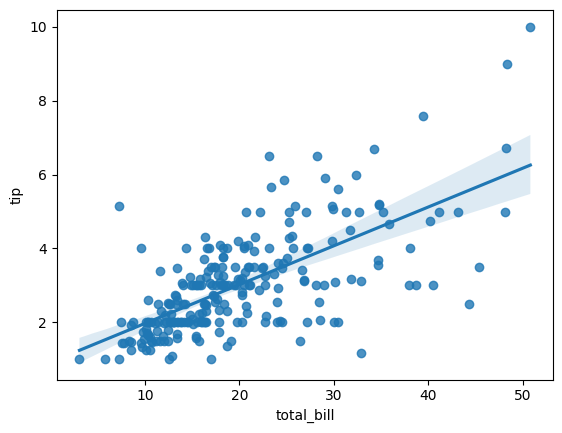

In [ ]:
# regression visualization plots
sns.regplot(x="total_bill", y="tip", data=tips);

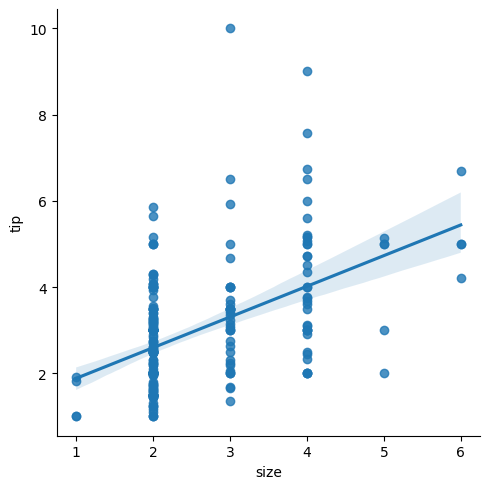

In [ ]:
sns.lmplot(x="size", y="tip", data=tips);

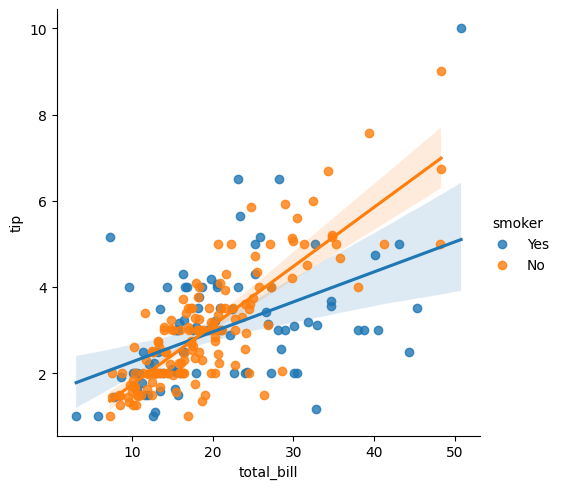

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

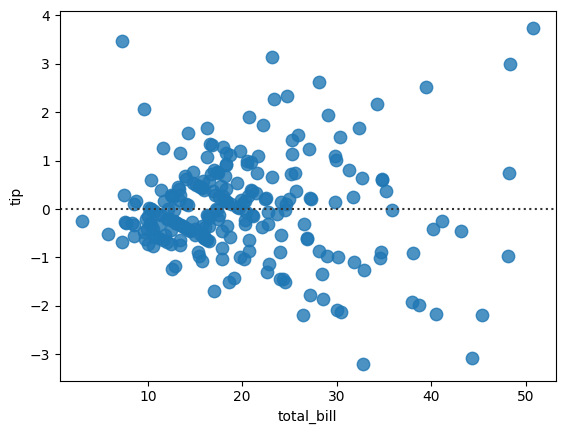

In [ ]:
# residual plot
sns.residplot(x="total_bill", y="tip", data=tips,
              scatter_kws={"s": 80});

[Back to Top](#scrollTo=J1VvPV7A4Mse&line=29&uniqifier=1)

# Plotting Multiple Objects
* The FacetGrid class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.
* A FacetGrid can be drawn with up to three dimensions: row, col, and hue.
* The first two have obvious correspondence with the resulting array of axes; think of the hue variable as a third dimension along a depth axis, where different levels are plotted with different colors.

https://seaborn.pydata.org/tutorial/axis_grids.html#

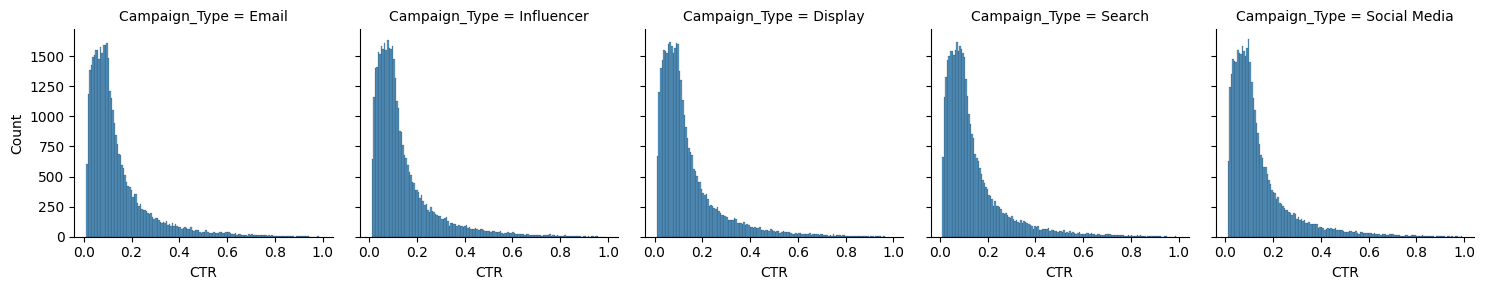

In [ ]:
g = sns.FacetGrid(df, col="Campaign_Type")
g.map(sns.histplot, "CTR")

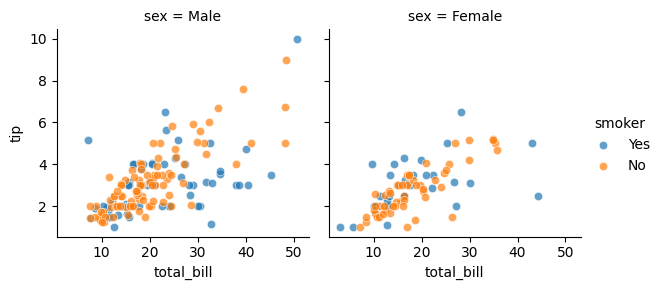

In [ ]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

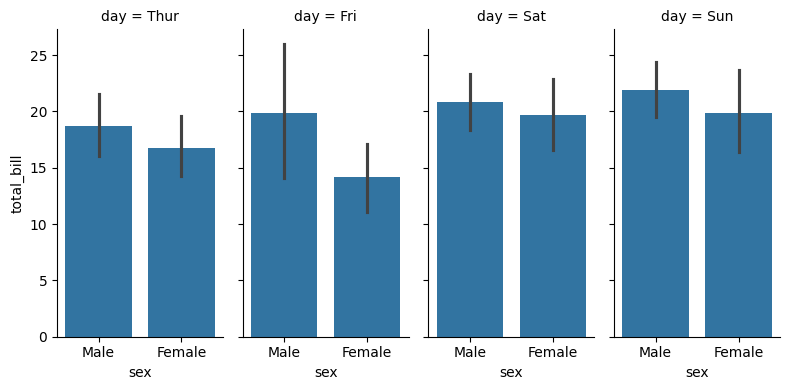

In [ ]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"])

[Back to Top](#scrollTo=J1VvPV7A4Mse&line=29&uniqifier=1)

# Correlation Heatmap

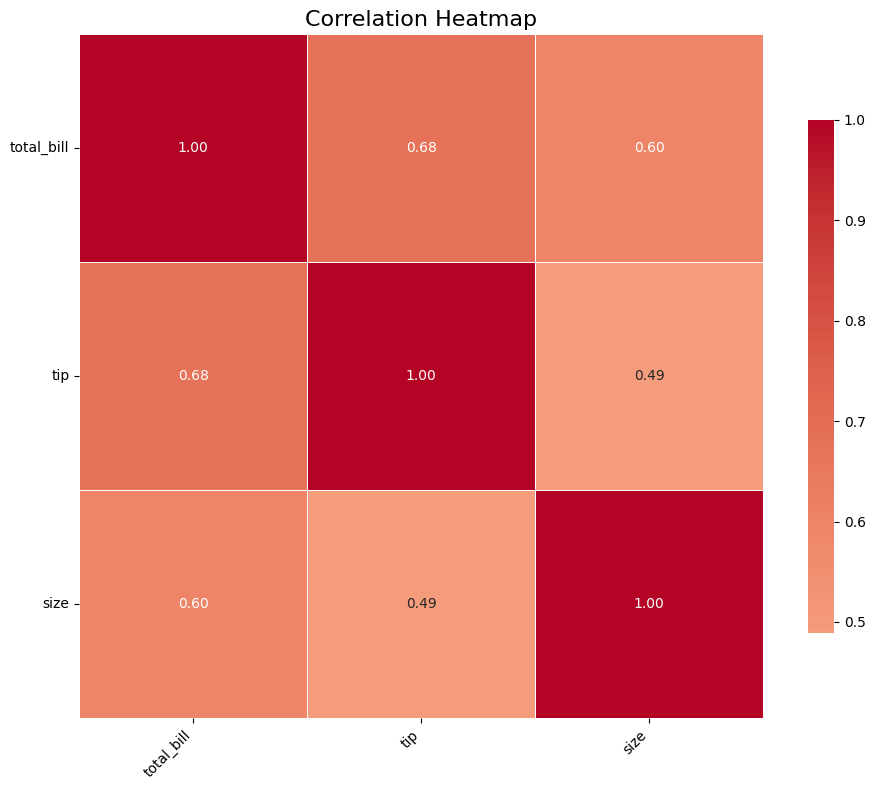

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Compute correlation matrix
corr_matrix = tips.corr(numeric_only=True)  # Use numeric_only=True for pandas >=1.5

# 2. Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,       # Show correlation coefficients
    cmap='coolwarm',  # Color map
    center=0,         # Center the colormap at zero
    fmt=".2f",        # Format the numbers to 2 decimal places
    square=True,      # Make cells square
    linewidths=0.5,   # Cell border lines
    cbar_kws={"shrink": 0.75}  # Shrink color bar
)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
corr_matrix

total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

[Back to Top](#scrollTo=J1VvPV7A4Mse&line=29&uniqifier=1)